In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import json
import pickle


In [2]:
import tensorflow as tf
# Number of available GPUs to tensorflow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


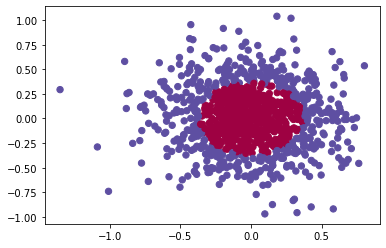

In [99]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
  mean=None,
  cov=0.1,
  n_samples=N,
  n_features=2,
  n_classes=2,
  shuffle=True,
  random_state=None
)

X, Y = gaussian_quantiles

Y = Y[:, np.newaxis]
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral)


## Funciones de activacion

In [8]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x) + 1)**2)
  else:
    return 1 / (1 + np.exp(-x))


def relu(x, derivate=False):
  if derivate:
    x[x <= 0] = 0
    x[x > 0] = 1
    return x
  else:
    return np.maximum(0, x)


## Funciones de perdida

In [9]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)


## Función de inicialización de parámetros

In [100]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L -1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2 ) - 1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
  return parameters


In [11]:
(np.random.rand(10, 3) * 2) -1

array([[ 0.14479184, -0.05738279,  0.78695381],
       [-0.8681348 ,  0.85095765,  0.18486157],
       [ 0.13969208, -0.65064372, -0.59413835],
       [-0.10120168, -0.7838444 , -0.47857314],
       [ 0.02680957,  0.06153675,  0.20895824],
       [ 0.95749581, -0.30318077, -0.02365454],
       [ 0.94117152, -0.84110776, -0.30766173],
       [-0.97528246,  0.18772621,  0.70437163],
       [ 0.56368122, -0.14225146, -0.32623372],
       [ 0.22009099, -0.91124936,  0.4871427 ]])

In [60]:
layers_dim = [2,4,8,1]

params = initialize_parameters_deep(layers_dim)
print(params)

{'W1': array([[-0.22332782, -0.39985783, -0.56573898,  0.56544263],
       [-0.33422317,  0.73676868,  0.16259293,  0.88661569]]), 'b1': array([[ 0.64805869,  0.98134988, -0.68798607,  0.77189103]]), 'W2': array([[ 0.78336596, -0.13190333, -0.14680572,  0.90074548, -0.08394034,
        -0.45387672, -0.48316609,  0.37629048],
       [-0.13799177,  0.76126619,  0.3744173 ,  0.79762541, -0.10769796,
        -0.28778452,  0.31987638, -0.35441981],
       [ 0.28724912, -0.02795434,  0.56438239,  0.94473416, -0.45032282,
        -0.84715435,  0.84291356, -0.81631874],
       [ 0.62542327, -0.97388664, -0.44961539, -0.52023907, -0.65931428,
        -0.62982002, -0.65315016, -0.62508049]]), 'b2': array([[-0.1321259 , -0.49033678, -0.86878139, -0.74649466,  0.26587584,
        -0.67318326, -0.34983372, -0.97498984]]), 'W3': array([[ 0.70953009],
       [-0.03704874],
       [-0.29499124],
       [ 0.5512971 ],
       [ 0.36879476],
       [ 0.17164435],
       [-0.39211919],
       [ 0.94729271

## Entrenamiento forward de la red neuronal

forward busca realizar una prediccion

In [62]:
params['W1']

array([[-0.22332782, -0.39985783, -0.56573898,  0.56544263],
       [-0.33422317,  0.73676868,  0.16259293,  0.88661569]])

In [63]:
params['W1'].shape

(2, 4)

In [64]:
X.shape

(1000, 2)

In [65]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [66]:
np.matmul(X, params['W1'])


array([[-0.09046234,  1.48953726,  1.0192026 ,  0.27900971],
       [ 0.5833811 , -1.50242974, -0.44738791, -1.55412109],
       [ 0.63664213, -0.73391661,  0.19636572, -1.66860532],
       ...,
       [ 0.67037176,  0.25180829,  0.98126477, -1.72600798],
       [ 0.23275562, -0.03500452,  0.24815221, -0.60298092],
       [-0.34378721, -0.76310174, -0.98243452,  0.86596832]])

In [67]:
# en numpy es igual para realizar
# el producto punto una operacion con @ o np.matmul
X@params['W1']


array([[-0.09046234,  1.48953726,  1.0192026 ,  0.27900971],
       [ 0.5833811 , -1.50242974, -0.44738791, -1.55412109],
       [ 0.63664213, -0.73391661,  0.19636572, -1.66860532],
       ...,
       [ 0.67037176,  0.25180829,  0.98126477, -1.72600798],
       [ 0.23275562, -0.03500452,  0.24815221, -0.60298092],
       [-0.34378721, -0.76310174, -0.98243452,  0.86596832]])

In [68]:
params
# entrada
params['A0'] = X
# multiplicacion de matrices mas el bias
params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
# el resultado se pasa por la funcion de activacion
params['A1'] = relu(params['Z1'])


params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
params['A2'] = relu(params['Z2'])

params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
# se usa sigmoid porque quiero que el resultado final sea la distribucion
# estadistica entre una clase y otra
params['A3'] = sigmoid(params['Z3'])

output = params['A3']

In [69]:
# las predicciones iniciales son muy erradas porque nos basamos en valores aleatorios
output[:10]

array([[0.58184239],
       [0.46516   ],
       [0.49739171],
       [0.54495298],
       [0.46566302],
       [0.44613132],
       [0.5218432 ],
       [0.65524654],
       [0.42813557],
       [0.3964718 ]])

In [70]:
output.shape


(1000, 1)

## Aplicando backpropagation y descenso del gradiente

backpropagation distribuye el error por toda la red neuronal

In [71]:
# backpropagation

params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
# con la traspuesta para poder hacer la operacion
params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])


# como ya no es la ultima capa el backpropagation se hace diferente
params['dZ2'] = np.matmul(
    params['dZ3'], params['W3'].T) * relu(params['A2'], True)
params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

params['dZ1'] = np.matmul(
    params['dZ2'], params['W2'].T) * relu(params['A1'], True)
params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])


In [72]:
params['dZ3'].shape


(1000, 1)

In [73]:
params['A2'].shape

(1000, 8)

In [74]:
params['A2'].T.shape


(8, 1000)

In [75]:
params['dW3'].shape

(8, 1)

## Gradient descent

El gradient descent se utiliza para actualizar los pesos y bias de la red


In [76]:
# Gradient descent
# el  0.0001  es el learning rate
params['W3'] = params['W3'] - params['dW3'] * 0.0001
# en algunos casos se usa la media en otros al suma
# lo que se busca es reducirlo a un valor
params['b3'] = params['b3'] - \
    np.mean(params['dW3'], axis=0, keepdims=True) * 0.0001


params['W2'] = params['W2'] - params['dW2'] * 0.0001
params['b2'] = params['b2'] - \
    np.mean(params['dW2'], axis=0, keepdims=True) * 0.0001

params['W1'] = params['W1'] - params['dW1'] * 0.0001
params['b1'] = params['b1'] - \
    np.mean(params['dW1'], axis=0, keepdims=True) * 0.0001




In [77]:
def train(X_data, lr, params, training=True):
  """
  x_data: datos de entrada \n
  lr: learning rate\n
  params: parametros \n
  training=True : esta en modo de entrenamiento \n
  """

  # Forward
  params['A0'] = X_data
  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])


  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if training:
    # Backpropagation
    params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(
        params['dZ3'], params['W3'].T) * relu(params['A2'], True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(
        params['dZ2'], params['W2'].T) * relu(params['A1'], True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

    # Gradient descent
    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - \
        np.mean(params['dW3'], axis=0, keepdims=True) * lr


    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - \
        np.mean(params['dW2'], axis=0, keepdims=True) * lr

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - \
        np.mean(params['dW1'], axis=0, keepdims=True) * lr




  return output


0.2648360177276513
0.26394174279099036
0.2631083373628692
0.26233105430671955
0.2616056946524933
0.26092840306495374
0.26029582757649633
0.25970453074616295
0.25915142671806907
0.25863374656704924
0.25814893520085525
0.257694629457134
0.25726866025058415
0.25686902435117204
0.2564938695634305
0.25614148325531694
0.25581028290533214
0.25549880851769863
0.2552057405510499
0.2549298889053442
0.2546699850008389
0.2544249553007506
0.2541938045245552
0.25397560948561965
0.25376951344820686
0.253574720957974
0.25339049310417056
0.25321614317549185
0.25305103188062655
0.2528945639378953
0.2527461886796181
0.25260539148667205
0.2524716918872646
0.2523446400003649
0.2522238250210575
0.2521093780611078
0.25200083331389883
0.2518973780045448
0.25179870063808213
0.25170451020194723
0.2516145347192247
0.25152851991206215
0.25144622796621974
0.2513674363885143
0.2512919369496354
0.2512195347054638
0.2511500471647685
0.25108335785493957
0.2510192711646551
0.2509576134936369
0.2508982458621777
0.250841

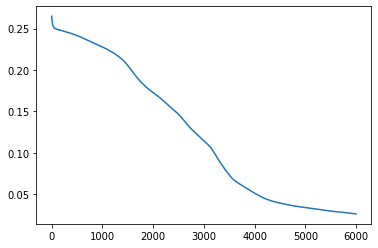

In [183]:
layers_dim = [2, 4, 8, 1]
params = initialize_parameters_deep(layers_dim)
errors = []
min_error = 1
min_error_epoch = 1

# entrenamiento por epocas
for _ in range(150000):
  output = train(X, 0.00001, params)
  if _ % 25 == 0:
    error = mse(Y, output)
    if error < min_error:
      min_error = error
      min_error_epoch = _
    print(error)
    errors.append(error)

print('Min error')
print(min_error)
print('Min error epoch')
print(min_error_epoch)

plt.plot(errors)
plt.show()


In [153]:
params

{'W1': array([[-4.39590149,  0.06165696,  8.39510707, -0.33650575],
        [-2.1381426 ,  7.69959616,  5.56686764, -0.38076839]]),
 'b1': array([[-2.54135021,  3.45981485,  5.75235565,  0.21001004]]),
 'W2': array([[ 0.44080983,  1.35886889, -0.62362055,  0.05874747, -0.95595343,
          1.17455833,  0.32420716, -0.03380517],
        [ 1.38174759,  1.10085293,  0.73142862, -0.28264033,  0.16245309,
         -1.88991028,  0.48270501,  0.37522837],
        [-1.50517982, -0.91318561,  0.8306518 , -0.5264479 ,  0.19506253,
          0.70918445,  0.65873597, -0.61030223],
        [ 2.24802741, -0.0617332 ,  3.82463204,  0.24889248,  0.93555127,
          3.56817937, -8.43112832, -0.87586751]]),
 'b2': array([[ 1.37698116,  1.22006495,  1.36497721, -0.70284632,  0.45674937,
          1.08371876, -2.42825034, -0.59896992]]),
 'W3': array([[ 3.95084184],
        [ 3.68617825],
        [-2.69984117],
        [ 0.53806107],
        [-0.68810201],
        [ 4.78526642],
        [ 5.75843276],


In [168]:
def save_params_to_file(params_obj, filename):
  with open(f'./notebooks/fundamentos_redes_neuronales_con_keras/{filename}', 'wb') as outfile:
    pickle.dump(params_obj, outfile)


In [188]:
# save_params_to_file(params, 'super_params.pickle')


In [170]:
def read_params_from_file(filename):
  with open(f'./notebooks/fundamentos_redes_neuronales_con_keras/{filename}', 'rb') as dict_file:

    loaded_params = pickle.load(dict_file)

    return loaded_params


In [171]:
# read_cool_params = read_params_from_file('cool_params.pickle')
# read_cool_params


{'W1': array([[-4.39590149,  0.06165696,  8.39510707, -0.33650575],
        [-2.1381426 ,  7.69959616,  5.56686764, -0.38076839]]),
 'b1': array([[-2.54135021,  3.45981485,  5.75235565,  0.21001004]]),
 'W2': array([[ 0.44080983,  1.35886889, -0.62362055,  0.05874747, -0.95595343,
          1.17455833,  0.32420716, -0.03380517],
        [ 1.38174759,  1.10085293,  0.73142862, -0.28264033,  0.16245309,
         -1.88991028,  0.48270501,  0.37522837],
        [-1.50517982, -0.91318561,  0.8306518 , -0.5264479 ,  0.19506253,
          0.70918445,  0.65873597, -0.61030223],
        [ 2.24802741, -0.0617332 ,  3.82463204,  0.24889248,  0.93555127,
          3.56817937, -8.43112832, -0.87586751]]),
 'b2': array([[ 1.37698116,  1.22006495,  1.36497721, -0.70284632,  0.45674937,
          1.08371876, -2.42825034, -0.59896992]]),
 'W3': array([[ 3.95084184],
        [ 3.68617825],
        [-2.69984117],
        [ 0.53806107],
        [-0.68810201],
        [ 4.78526642],
        [ 5.75843276],


In [172]:
# output


Al alterar los valores de learning rate y epoch hay que considerar que afectan

el **epoch** es cuantas iteraciones realiza la red para llegar a una conclusion y es posible que no tenga suficientes épocas para llegar a una conclusion optima como también es posible que tenga demasiadas y luego de llegar a una conclusion optima solo aumenta el error en las siguientes iteraciones

el **learning rate** es que tan amplios son los pasos que da la función tras cada iteración, si es muy pequeño es posible que tarde demasiado en alcanzar el punto mínimo de la función, pero si es muy grande es posible que pase sobre el punto óptimo y no logre llegar a un punto cercano

In [184]:
def paint_with_params(c_params):
  # genera datos con la misma distribucion
  data_test = (np.random.rand(1000, 2) * 2) - 1
  # predice el valor en base al entrenado
  y = train(data_test, 0.0001, c_params, training=False)

  # lo divide en 0 y 1 para la clasificación que deberian tener
  y = np.where(y >= 0.5, 1, 0)
  #y

  plt.scatter(
      data_test[:, 0],
      data_test[:, 1],
      c=y[:, 0],
      s=40,
      cmap=plt.cm.Spectral
  )


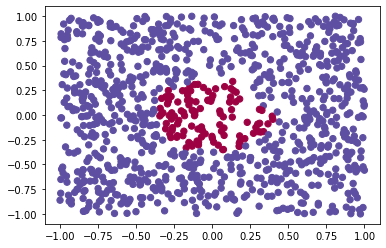

In [187]:
paint_with_params(params)


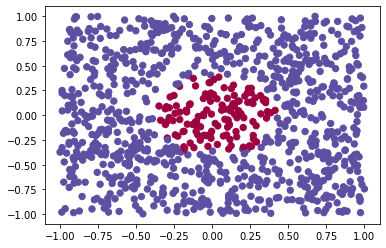

In [186]:
paint_with_params(read_cool_params)
